# LINEAR REGRESSION MODEL FOR PROPERTIES IN BROOKLYN 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [17]:
properties = pd.read_csv("full_sale.csv")

In [19]:
properties.head()

,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month,month_number,geographical_region
0,0,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,R5,330 JAY STREET,499401179.0,2008-04-23,2008,0.0,0.0,Anonymous,4,April,Northwestern Brooklyn
1,1,DUMBO,29 COMMERCIAL GARAGES,4,G7,85 JAY STREET,345000000.0,2016-12-20,2016,134988.0,0.0,85 JAY STREET BROOKLY,12,December,Northwestern Brooklyn
2,2,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,O6,29 COLUMBIA HEIGHTS,340000000.0,2016-08-03,2016,32000.0,304650.0,25-30 COLUMBIA HEIGHT,8,August,Northwestern Brooklyn
3,3,MILL BASIN,22 STORE BUILDINGS,4,K6,5120 AVENUE U,276947000.0,2012-11-28,2012,905000.0,2548000.0,BROOKLYN KINGS PLAZA,11,November,Southern Brooklyn
4,4,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,H8,21 CLARK STREET,202500000.0,2017-10-31,2017,20267.0,356000.0,WATCHTOWER C/O REAL P,10,October,Northwestern Brooklyn


In [20]:
properties = properties.loc[properties["sale_price"] > 100000]

In [21]:
properties.head()

,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month,month_number,geographical_region
0,0,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,R5,330 JAY STREET,499401179.0,2008-04-23,2008,0.0,0.0,Anonymous,4,April,Northwestern Brooklyn
1,1,DUMBO,29 COMMERCIAL GARAGES,4,G7,85 JAY STREET,345000000.0,2016-12-20,2016,134988.0,0.0,85 JAY STREET BROOKLY,12,December,Northwestern Brooklyn
2,2,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,O6,29 COLUMBIA HEIGHTS,340000000.0,2016-08-03,2016,32000.0,304650.0,25-30 COLUMBIA HEIGHT,8,August,Northwestern Brooklyn
3,3,MILL BASIN,22 STORE BUILDINGS,4,K6,5120 AVENUE U,276947000.0,2012-11-28,2012,905000.0,2548000.0,BROOKLYN KINGS PLAZA,11,November,Southern Brooklyn
4,4,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,H8,21 CLARK STREET,202500000.0,2017-10-31,2017,20267.0,356000.0,WATCHTOWER C/O REAL P,10,October,Northwestern Brooklyn


In [24]:
year_price = properties.groupby("year_of_sale")["sale_price"].mean().reset_index().rename(columns=({"sale_price":"average_sale_price"}))

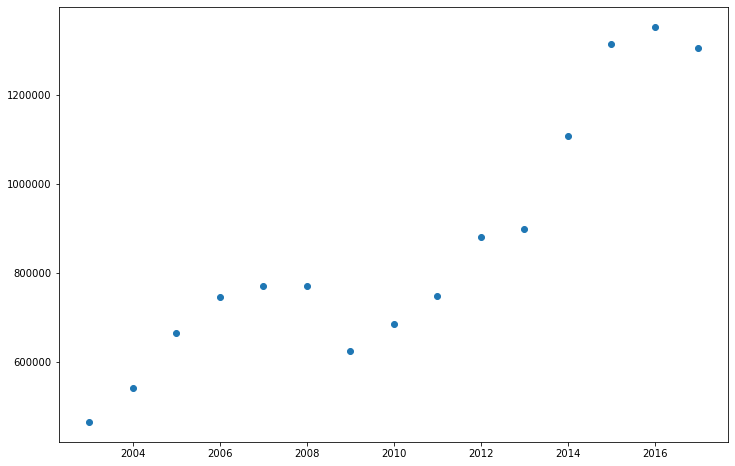

In [26]:
plt.figure(figsize=(12, 8))
plt.ticklabel_format(axis="y", style="plain")
plt.scatter(year_price["year_of_sale"], year_price["average_sale_price"])

In [27]:
x = year_price[["year_of_sale"]]
y = year_price[["average_sale_price"]]

In [28]:
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

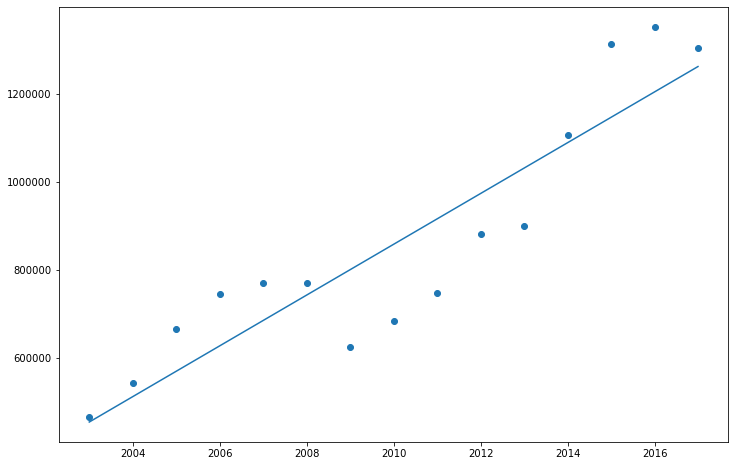

In [29]:
plt.figure(figsize=(12, 8))
plt.ticklabel_format(axis="y", style="plain")
plt.scatter(year_price["year_of_sale"], year_price["average_sale_price"])
plt.plot(year_price["year_of_sale"], regressor.predict(x))

In [30]:
regressor.score(x, y)

0.8234213445317059

In [32]:
year_price = sm.add_constant(year_price)


In [33]:
year_price_y = year_price["average_sale_price"]
year_price_x = year_price[['const', 'year_of_sale']]
year_price_ols = sm.OLS(year_price_y, year_price_x).fit()
year_price_ols.summary()

C:\Users\Sweezy\anaconda3\envs\matrix\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     average_sale_price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     60.62
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           3.01e-06
Time:                        22:53:17   Log-Likelihood:                -196.16
No. Observations:                  15   AIC:                             396.3
Df Residuals:                      13   BIC:                             397.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.153e+08   1.49e+07     -7.728      0.000   -1.48e+08   -8.31e+07
year_of_sale  5.781e+04   7424.791      7.786      0.000    4.18e+04    7.38e+04
==============================================================================
Omnibus:                        2.615   Durbin-Watson:                   0.574
Prob(Omnibus):                  0.271   Jarque-Bera (JB):                1.245
Skew:                          -0.326   Prob(JB):                        0.537
Kurtosis:                       1.748   Cond. No.                     9.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""